In [91]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

### CSV FILE: cleaning


In [92]:
ds = pd.read_csv("USvideos.csv")

In [93]:
ds.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [94]:
ds.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [95]:
# checking for  null values
ds.trending_date.isnull().sum()

0

In [96]:
# date to datetime
ds["trending_date"] = pd.to_datetime(ds["trending_date"], format = '%y.%d.%m')


### Import Names of Categories and Merge with the Main Dataframe

In [97]:
with open('US_category_id.json', 'r') as f:
      categories = json.load(f)

In [98]:
categories_n = {}
for category in categories['items']:
    categories_n [category['id']] = category['snippet']['title']

In [99]:
type(categories_n)

dict

In [100]:
# import dictionary into a dataframe
categories = pd.DataFrame.from_dict(categories_n, orient = 'index', columns = [['category_name']]).reset_index()
categories

categories.columns = ['category_id','category_name']

categories['category_id'] = categories['category_id'].astype('int')

In [101]:
# merging with previous dataframe on category id
ds= pd.merge(ds, categories, on = 'category_id', how = 'left')
ds.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


### Wikipedia Data 

#### 2017

In [102]:
url = 'https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States'

html = requests.get(url).content

soup = BeautifulSoup(html, 'lxml')

table_2017 = soup.find_all('table', attrs = {'class':'wikitable sortable'})[3]

rows_2017 = table_2017.find_all('tr')

date_2017 = []
loc_2017 = []
dead_2017 = []
injured_2017 = []
total_2017 = []
description_2017 = []

for row in rows_2017[1:]:
    date_2017.append(row.find_all('td')[0].text)
    loc_2017.append(row.find_all('td')[1].text)
    dead_2017.append(row.find_all('td')[2].text)
    injured_2017.append(row.find_all('td')[3].text)
    total_2017.append(row.find_all('td')[4].text)
    description_2017.append(row.find_all('td')[5].text)

In [103]:
date_2017 = [element.replace('\n','') for element in date_2017]
loc_2017 = [element.replace('\n','') for element in loc_2017]
dead_2017 = [element.replace('\n','').replace('[n 1]','').replace('[n 5]','') for element in dead_2017]
injured_2017 = [element.replace('\n','').replace('[n 1]','') for element in injured_2017]
total_2017 = [element.replace('\n','') for element in total_2017]
description_2017 = [element.replace('\n','') for element in description_2017]


In [104]:
date_2017 = [element.replace('December', '12,') if 'December' in element else element for element in date_2017]
date_2017 = [element.replace('November', '11,') if 'November' in element else element for element in date_2017]
date_2017 = [element.replace('October', '10,') if 'October' in element else element for element in date_2017]
date_2017 = [element.replace('September', '09,') if 'September' in element else element for element in date_2017]
date_2017 = [element.replace('August', '08,') if 'August' in element else element for element in date_2017]
date_2017 = [element.replace('July', '07,') if 'July' in element else element for element in date_2017]
date_2017 = [element.replace('June', '06,') if 'June' in element else element for element in date_2017]
date_2017 = [element.replace('May', '05,') if 'May' in element else element for element in date_2017]
date_2017 = [element.replace('April', '04,') if 'April' in element else element for element in date_2017]
date_2017 = [element.replace('March', '03,') if 'March' in element else element for element in date_2017]
date_2017 = [element.replace('February', '02,') if 'February' in element else element for element in date_2017]
date_2017 = [element.replace('January', '01,') if 'January' in element else element for element in date_2017]
date_2017[17] = '04, 13, 2017'

In [105]:
import datetime as dt

date_2017_format = []
for element in date_2017:
    date_time_obj = dt.datetime.strptime(element, '%m, %d, %Y')
    date_2017_format.append(date_time_obj.date())

In [106]:
header_2017 = ['Date','Location','Dead','Injured','Total','Description']

In [107]:
df_2017 = pd.DataFrame(list(zip(date_2017_format,loc_2017,dead_2017,injured_2017,total_2017,description_2017)),columns = header_2017)

df_2017

,Date,Location,Dead,Injured,Total,Description
0,2017-12-31,"Highlands Ranch, Colorado",2,6,8,Copper Canyon Apartment Homes shooting: After ...
1,2017-12-07,"Aztec, New Mexico",3,0,3,Aztec High School shooting: A man walked into ...
2,2017-11-13,"Tehama County, California",6,12,18,Rancho Tehama Reserve shootings: A man killed ...
3,2017-11-05,"Sutherland Springs, Texas",27,20,47,Sutherland Springs church shooting: A gunman a...
4,2017-10-01,"Las Vegas, Nevada",59,422,481,2017 Las Vegas shooting: A man in a high floor...
5,2017-09-24,"Antioch, Tennessee",1,8,9,Burnette Chapel shooting: A man killed a woman...
6,2017-09-10,"Plano, Texas",9,1,10,2017 Plano shooting: A man entered his ex-wife...
7,2017-08-28,"Clovis, New Mexico",2,4,6,Clovis library shooting: A sixteen-year-old ki...
8,2017-07-01,"Little Rock, Arkansas",0,28,28,Little Rock nightclub shooting: Twenty-eight p...
9,2017-06-30,"New York City, New York",2,6,8,Bronx-Lebanon Hospital attack: A former hospit...


#### 2018

In [108]:
table_2018 = soup.find_all('table', attrs = {'class':'wikitable sortable'})[2]

rows_2018 = table_2018.find_all('tr')

date_2018 = []
loc_2018 = []
dead_2018 = []
injured_2018 = []
total_2018 = []
description_2018 = []

for row in rows_2018[1:]:
    date_2018.append(row.find_all('td')[0].text)
    loc_2018.append(row.find_all('td')[1].text)
    dead_2018.append(row.find_all('td')[2].text)
    injured_2018.append(row.find_all('td')[3].text)
    total_2018.append(row.find_all('td')[4].text)
    description_2018.append(row.find_all('td')[5].text)

date_2018 = [element.replace('\n','') for element in date_2018]
loc_2018 = [element.replace('\n','') for element in loc_2018]
dead_2018 = [element.replace('\n','').replace('[n 1]','').replace('[n 5]','') for element in dead_2018]
injured_2018 = [element.replace('\n','').replace('[n 1]','').replace('[n 2]', '').replace('[n 3]', '').replace('[n 4]', '') for element in injured_2018]
total_2018 = [element.replace('\n','') for element in total_2018]
description_2018 = [element.replace('\n','') for element in description_2018]

date_2018 = [element.replace('December', '12,') if 'December' in element else element for element in date_2018]
date_2018 = [element.replace('November', '11,') if 'November' in element else element for element in date_2018]
date_2018 = [element.replace('October', '10,') if 'October' in element else element for element in date_2018]
date_2018 = [element.replace('September', '09,') if 'September' in element else element for element in date_2018]
date_2018 = [element.replace('August', '08,') if 'August' in element else element for element in date_2018]
date_2018 = [element.replace('July', '07,') if 'July' in element else element for element in date_2018]
date_2018 = [element.replace('June', '06,') if 'June' in element else element for element in date_2018]
date_2018 = [element.replace('May', '05,') if 'May' in element else element for element in date_2018]
date_2018 = [element.replace('April', '04,') if 'April' in element else element for element in date_2018]
date_2018 = [element.replace('March', '03,') if 'March' in element else element for element in date_2018]
date_2018 = [element.replace('February', '02,') if 'February' in element else element for element in date_2018]
date_2018 = [element.replace('January', '01,') if 'January' in element else element for element in date_2018]
date_2018[11] = '06, 4, 2018'

import datetime as dt

date_2018_format = []
for element in date_2018:
    date_time_obj = dt.datetime.strptime(element, '%m, %d, %Y')
    date_2018_format.append(date_time_obj.date())

header_2018 = ['Date','Location','Dead','Injured','Total','Description']

df_2018 = pd.DataFrame(list(zip(date_2018_format,loc_2018,dead_2018,injured_2018,total_2018,description_2018)),columns = header_2018)

#### 2017 and 2018 together

In [109]:
df_wikipedia = pd.concat([df_2017,df_2018])
df_wikipedia.reset_index()


,index,Date,Location,Dead,Injured,Total,Description
0,0,2017-12-31,"Highlands Ranch, Colorado",2,6,8,Copper Canyon Apartment Homes shooting: After ...
1,1,2017-12-07,"Aztec, New Mexico",3,0,3,Aztec High School shooting: A man walked into ...
2,2,2017-11-13,"Tehama County, California",6,12,18,Rancho Tehama Reserve shootings: A man killed ...
3,3,2017-11-05,"Sutherland Springs, Texas",27,20,47,Sutherland Springs church shooting: A gunman a...
4,4,2017-10-01,"Las Vegas, Nevada",59,422,481,2017 Las Vegas shooting: A man in a high floor...
5,5,2017-09-24,"Antioch, Tennessee",1,8,9,Burnette Chapel shooting: A man killed a woman...
6,6,2017-09-10,"Plano, Texas",9,1,10,2017 Plano shooting: A man entered his ex-wife...
7,7,2017-08-28,"Clovis, New Mexico",2,4,6,Clovis library shooting: A sixteen-year-old ki...
8,8,2017-07-01,"Little Rock, Arkansas",0,28,28,Little Rock nightclub shooting: Twenty-eight p...
9,9,2017-06-30,"New York City, New York",2,6,8,Bronx-Lebanon Hospital attack: A former hospit...


In [110]:
df_wikipedia.head()

,Date,Location,Dead,Injured,Total,Description
0,2017-12-31,"Highlands Ranch, Colorado",2,6,8,Copper Canyon Apartment Homes shooting: After ...
1,2017-12-07,"Aztec, New Mexico",3,0,3,Aztec High School shooting: A man walked into ...
2,2017-11-13,"Tehama County, California",6,12,18,Rancho Tehama Reserve shootings: A man killed ...
3,2017-11-05,"Sutherland Springs, Texas",27,20,47,Sutherland Springs church shooting: A gunman a...
4,2017-10-01,"Las Vegas, Nevada",59,422,481,2017 Las Vegas shooting: A man in a high floor...


### Only mass shooting dates  --- TO CHANGE


In [111]:
#mass_shooting_dates = df_wikipedia["Date"]

In [112]:
mass_shooting_dates = ["2018-05-18", "2018-04-22", "2018-04-03", "2018-03-09", "2018-02-14", "2018-01-28", "2018-01-23","2017-12-31","2017-12-07"]

In [113]:
#df_wikipedia["Date"]

In [114]:
mass_shooting_dates

['2018-05-18',
 '2018-04-22',
 '2018-04-03',
 '2018-03-09',
 '2018-02-14',
 '2018-01-28',
 '2018-01-23',
 '2017-12-31',
 '2017-12-07']

In [115]:
mshoot_ds = ds[ds["trending_date"].isin(mass_shooting_dates)]

In [116]:
mshoot_ds.shape

(1799, 17)

In [117]:
mshoot_ds.shape

(1799, 17)

## Overall Calculations

### Shooting Days

In [118]:
# group by date and count types of categories
share_daily_mh = mshoot_ds.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily_mh.columns = ['trending_date', 'category_id','tot_per_cat']
share_daily_mh.head()

,trending_date,category_id,tot_per_cat
0,2017-12-07,1,10
1,2017-12-07,2,2
2,2017-12-07,10,33
3,2017-12-07,15,3
4,2017-12-07,17,15


In [119]:
#get average of trending category per date
share_daily_masss = share_daily_mh.groupby(['category_id'], as_index=False).agg({'tot_per_cat':'mean'})
share_daily_masss=share_daily_masss.rename(columns = {"tot_per_cat":"avg_per_cat_sd"})
share_daily_masss.head()

,category_id,avg_per_cat_sd
0,1,11.666667
1,2,2.500000
2,10,28.333333
3,15,5.111111
4,17,11.666667


### Non Shooting Days

In [120]:
non_shooting_days=ds[~ds['trending_date'].isin(mass_shooting_dates)]
non_shooting_days.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [121]:
non_shooting_days.shape

(39150, 17)

In [122]:
#calculating count of video categories on non-shooting-days
share_daily_non_sd = non_shooting_days.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily_non_sd.columns = ['trending_date', 'category_id','tot_per_cat']



In [123]:
share_daily_non_sd.shape

(2736, 3)

In [124]:
# calculating mean of video cateogories on non-shooting-days
share_daily_non_sd = share_daily_non_sd.groupby(['category_id'], as_index=False).agg({'tot_per_cat':'mean'})
share_daily_non_sd=share_daily_non_sd.rename(columns = {"tot_per_cat":"avg_per_cat_non_sd"})


## Merge averages of shooting and non shooting days

In [125]:

averages= pd.merge(share_daily_non_sd, share_daily_masss, on = 'category_id', how = 'left')


In [126]:
averages["differences"]=averages["avg_per_cat_sd"]-averages["avg_per_cat_non_sd"]

averages= pd.merge(averages, categories, on = 'category_id', how = 'left')


In [127]:
averages = averages [['category_id','category_name', 'avg_per_cat_non_sd', 'avg_per_cat_sd', 'differences']]

In [128]:
averages['relativ_diff in %'] = averages['differences']/averages['avg_per_cat_non_sd']*100
averages
averages=averages.round(decimals=2)

,category_id,category_name,avg_per_cat_non_sd,avg_per_cat_sd,differences,relativ_diff in %
0,1,Film & Animation,11.43,11.67,0.24,2.08
1,2,Autos & Vehicles,2.87,2.50,-0.37,-12.77
2,10,Music,31.72,28.33,-3.39,-10.68
3,15,Pets & Animals,4.48,5.11,0.63,14.04
4,17,Sports,10.56,11.67,1.11,10.52
5,19,Travel & Events,2.33,1.88,-0.46,-19.57
6,20,Gaming,4.30,3.75,-0.55,-12.80
7,22,People & Blogs,15.61,16.78,1.17,7.50
8,23,Comedy,16.88,16.56,-0.32,-1.91
9,24,Entertainment,48.67,47.11,-1.56,-3.21


### Baseline for daily averages

In [129]:
share_daily = ds.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily.columns = ['trending_date', 'category_id','tot_per_cat']


In [130]:
total_per_day = ds.groupby(['trending_date'], as_index=False).agg({'category_name':'count'})
total_per_day.columns = ['trending_date', 'total_per_day']
total_per_day.head()

,trending_date,total_per_day
0,2017-11-14,200
1,2017-11-15,200
2,2017-11-16,200
3,2017-11-17,200
4,2017-11-18,200


In [131]:
share_daily= pd.merge(share_daily, total_per_day, on = 'trending_date', how = 'left')
share_daily.head()

,trending_date,category_id,tot_per_cat,total_per_day
0,2017-11-14,1,8,200
1,2017-11-14,2,4,200
2,2017-11-14,10,45,200
3,2017-11-14,15,5,200
4,2017-11-14,17,9,200


# Visualisation

In [134]:
averages = averages.round(1)
#average_ordered= averages.sort_values(by=["avg_per_cat_non_sd"], ascending = [False])
average_ordered = average_ordered[['category_name', 'avg_per_cat_non_sd', 'avg_per_cat_sd', 'differences', 'relativ_diff in %']]
average_ordered=average_ordered.rename(columns={'category_name': "Category", 'avg_per_cat_non_sd': "#Videos on NON Shooting Days", "avg_per_cat_sd": "#Videos on Shooting Days", "differences": "Change in #Videos", "relativ_diff in %": "Change in %"}, errors="raise")

In [135]:
average_ordered

,Category,#Videos on NON Shooting Days,#Videos on Shooting Days,Change in #Videos,Change in %
9,Entertainment,48.7,47.1,-1.6,-3.2
2,Music,31.7,28.3,-3.4,-10.7
11,Howto & Style,20.2,20.6,0.3,1.7
8,Comedy,16.9,16.6,-0.3,-1.9
7,People & Blogs,15.6,16.8,1.2,7.5
10,News & Politics,12.1,13.0,0.9,7.5
13,Science & Technology,11.7,12.3,0.6,5.6
0,Film & Animation,11.4,11.7,0.2,2.1
4,Sports,10.6,11.7,1.1,10.5
12,Education,8.0,9.0,1.0,12.0


In [81]:
#setting up
video_categories = averages["category_name"]
avg_per_cat_non_sd = averages["avg_per_cat_non_sd"]
avg_per_cat_sd = averages["avg_per_cat_sd"]

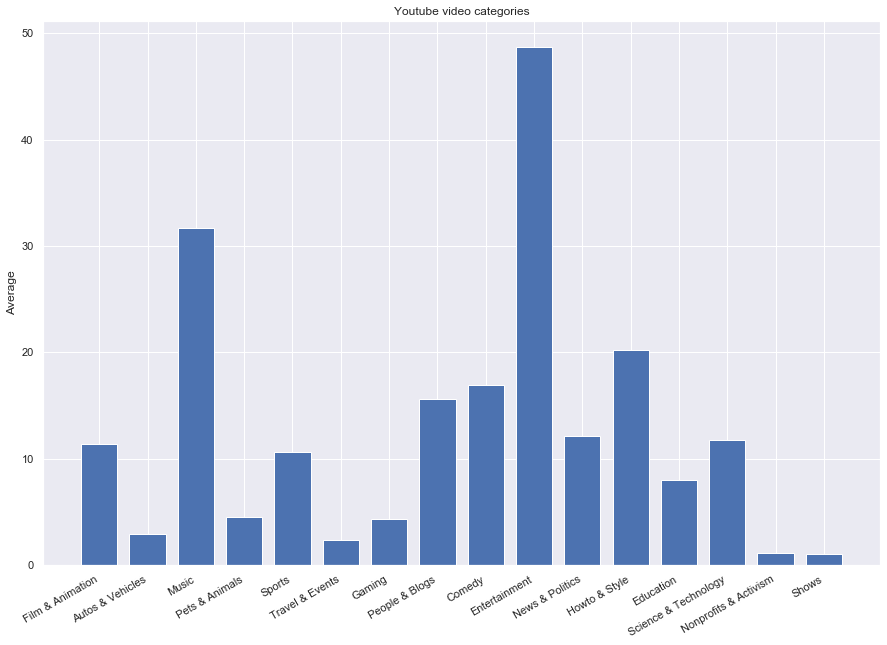

In [82]:
# visualising Daily average on days without shootings

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
width = 0.75 #widht of the bars

cat_ns = ax.bar(video_categories, avg_per_cat_non_sd, width, label ="Non shooting day")

ax.set_ylabel("Average")
ax.set_title("Youtube video categories")
plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment = "right")

plt.show()

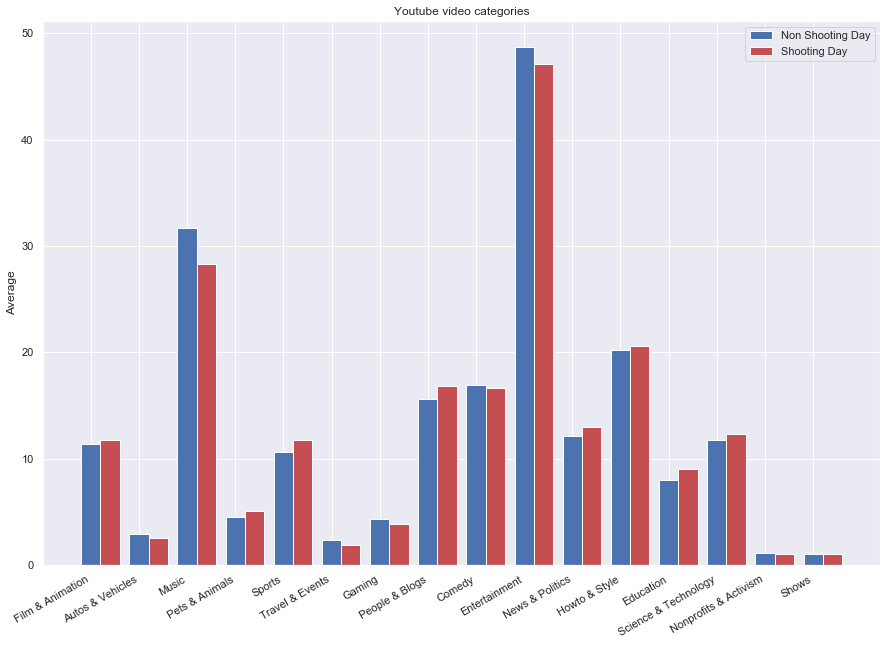

In [83]:
# comparing video trend categories on days with and without shootings

#number of pairs of bars:
n = len(video_categories)

#position of bars on x-axis
ind = np.arange(n)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
width = 0.4 #widht of the bars


cat_ns = ax.bar(ind, avg_per_cat_non_sd, width, label ="Non shooting day", color = "b")

cat_sd = ax.bar(ind + width, avg_per_cat_sd, width, label = "Shooting day", color = "r")

ax.set_ylabel("Average")
ax.set_title("Youtube video categories")
ax.legend((cat_ns, cat_sd), ("Non Shooting Day", "Shooting Day"))

#list of labels
plt.xticks(ind, video_categories)

plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment = "right")


plt.show()

